# **<center>Factors Determining Diamond Prices</center>**
## <center>Aston Pearcy</center>

### Context

The dataset I am analysing is the "Diamond Prices" dataset obtained from Kaggle (https://www.kaggle.com/datasets/nancyalaswad90/diamonds-prices). The dataset contains almost 54000 observations over 10 variables, both numerical and categorical. The numerical variables are: carat, depth, table (the size of the flat plate on top of the gem in mm), x, y, and z, which are the dimensions of the gem in mm, and price. The variables cut, color, and clarity are all ordered factor variables. I wanted to see what relationship the different variables have on the price of the diamond. I was particularly interested in the carat, clarity, color, and cut variables as these are termed the "4 C's" in diamond quality assessing and good values in each of these areas can make a diamond well sought after. 

### Importing packages

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading in and cleaning data

In [234]:
df = pd.read_csv("Data/Diamonds Prices2022.csv")

In [235]:
df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Looks like the Unnamed:0 column is just a number for the entries so I'm going to get rid of that.

In [236]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [237]:
df.shape

(53943, 10)

Data set is relatively large (~54000 observations) across 10 variables.

### Data analysis

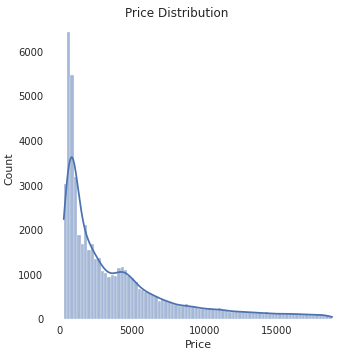

In [249]:
with plt.style.context('seaborn'):
    sns.set_style("white")
    d = sns.displot(x='price', data=df, kde = True)
    d.fig.subplots_adjust(top=0.95)
    d.fig.suptitle('Price Distribution')
    d.set_axis_labels("Price", "Count")

There's a large amount of data that is located at lower price points, with less and less at higher prices. This is reasonable and makes sense considering that the majority of diamond buyers (consumers) are probably not buying diamonds that cost around $15,000. This skew in the data needs to be considered when making any insights. 

Next, I wanted to look at the influence of the cut of the diamond on its price. The dataset contains five types of cut, three of which ("Very Good", "Good", "Fair") are grades determined by the Gemological Institute of America (GIA) and so are reputable. The cut of diamond has a large effect on the brilliance of it, because the cut determines the percent of light that is reflected out of the diamond. Light enters the diamond through the flat plane on the top (the table), and is reflected off of the prismatic cone-like structure at the bottom to provide brilliance and sparkle. A more brialliant diamond is considered more beautiful and so possibly more valuable.

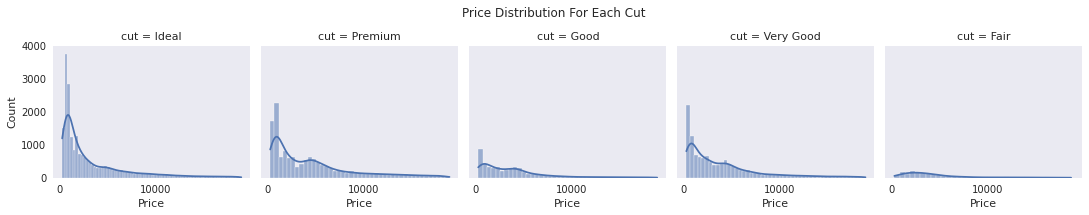

In [239]:
with plt.style.context('seaborn'):
    sns.set_style("dark")
    a = sns.FacetGrid(df, col="cut")
    a.map(sns.histplot, "price", kde =True)
    a.fig.subplots_adjust(top=0.8)
    a.fig.suptitle('Price Distribution For Each Cut')

for ax in a.axes[0]:
    ax.set_ylabel('Count')
    ax.set_xlabel('Price')
    ax.set_ylim(0,4000)

The plots above show that there are a large amount of diamonds in the "Ideal" grade, and a small amount of diamonds in the "Fair" grade. This plot is hard to make any real meaningful insight into, so I decided to use the log scale of the price and see if a trend could be observed.

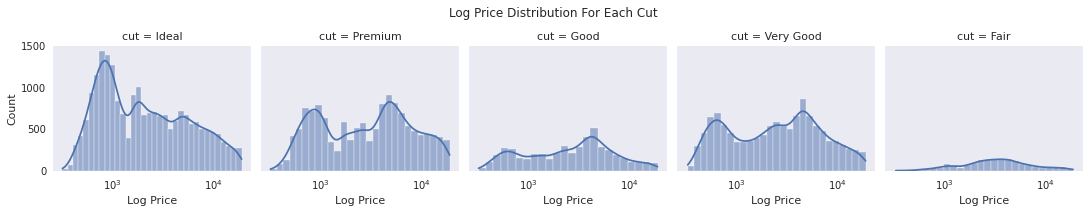

In [240]:
with plt.style.context('seaborn'):
    sns.set_style("dark")
    a = sns.FacetGrid(df, col="cut")
    a.map(sns.histplot, "price", kde =True, log_scale = True)
    a.fig.subplots_adjust(top=0.8)
    a.fig.suptitle('Log Price Distribution For Each Cut')

for ax in a.axes[0]:
    ax.set_ylabel('Count')
    ax.set_xlabel('Log Price')
    ax.set_ylim(0,1500)

Now it can be seen for the "Ideal" cut that the data is skewed to the left, while in the other 4 cuts the data does not seem to have a great amount of skew. There seem to be two distinct peaks in the "Premium" and "Very Good" cuts, and to a lesser extent in the "Good" cut. These peaks could possibly relate to diamonds that are marketed as general jewellery diamonds (the lower peak) and ones that are marketed as diamonds more suited to wedding rings and other special pieces (the higher peak).  

After examining how the cut of the diamond influences the price, I then turned to the relationship that the carat has with the price of the diamond. The carat (a unit of mass) of a diamond is often included in the title of an online listing of a jewellery item, or on the name of the item in store, and so likely displays some sort of relationship with the price.  

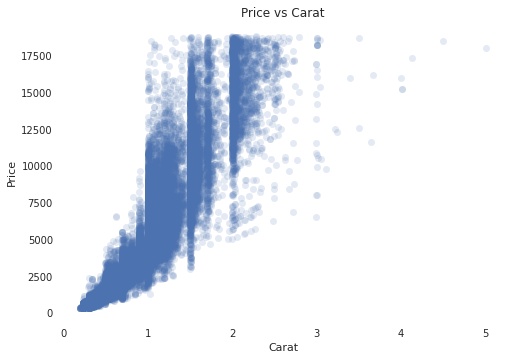

In [253]:
with plt.style.context('seaborn'):
    sns.set_style("white")
    b = sns.scatterplot(x = 'carat', y= 'price', data=df, linewidth=0, alpha = 0.15)
    b.set_title("Price vs Carat")
    plt.xlabel("Carat")
    plt.ylabel("Price")

As seen previously, a large amount of the data resides at lower price points. There seems to be a positive relationship between the carat of a diamond and the price of it. There are clear steps at 1, 1.5 and 2 carats, and a smaller one at 3. Although each step contains data of a single carat value, the price varies substantially. Other variables such as color and clarity might be playing a role in this. I'll take a look at those.

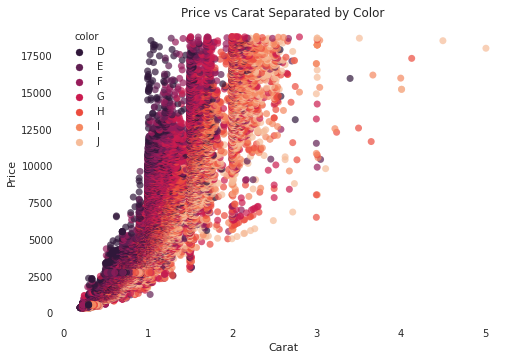

In [257]:
color_rank = ["D", "E", "F", "G", "H", "I", "J"] 
with plt.style.context('seaborn'):
    sns.set_style("white")
    c = sns.scatterplot(x = 'carat', y= 'price', data=df, linewidth=0, alpha=0.7, hue='color', palette="rocket", hue_order=color_rank)
    c.set_title("Price vs Carat Separated by Color")
    plt.xlabel("Carat")
    plt.ylabel("Price")

Looks like color plays a big part in the price of a diamond. The colours earlier in the alphabet seem to be priced higher per carat than those later in the alphabet.

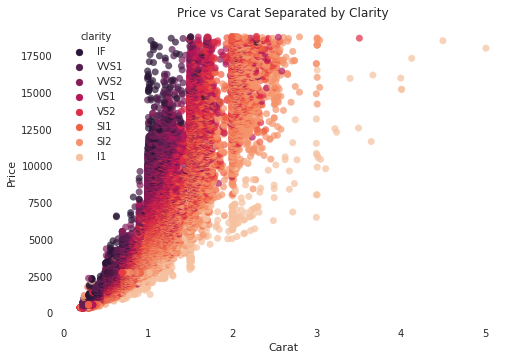

In [258]:
clarity_rank = ["IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1"] 
with plt.style.context('seaborn'):
    sns.set_style("white")
    d = sns.scatterplot(x = 'carat', y= 'price', data=df, linewidth=0, alpha=0.7, hue='clarity', palette="rocket", hue_order=clarity_rank)
    d.set_title("Price vs Carat Separated by Clarity")
    plt.xlabel("Carat")
    plt.ylabel("Price")

Seems that clarity also plays a big part in the price of a diamond. The higest price per carat is given to the "IF" clarity. This is likely the most clean of the diamonds and possibly has the least impurities. 

Exploring the correlation of numerical variables with the price variable:

Text(0.5, 1.0, 'Correlation of Price')

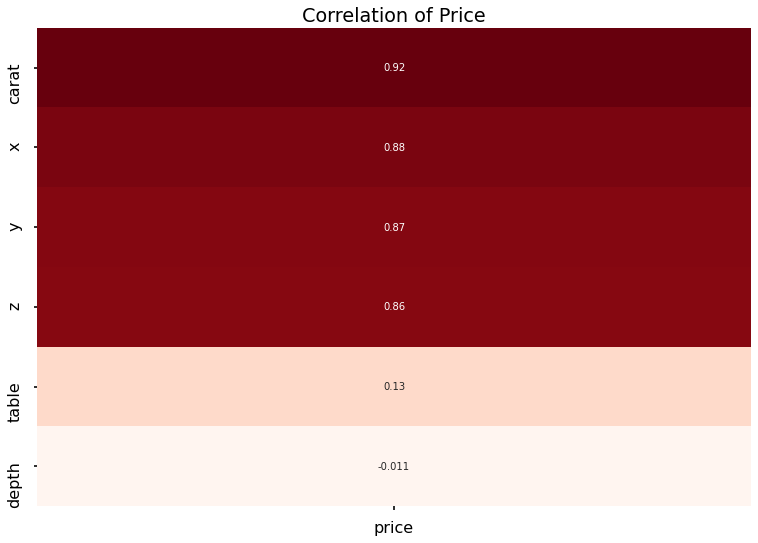

In [261]:
dfc = df.corr()['price'].sort_values(ascending=False)
dfc = pd.DataFrame(dfc)
dfc = dfc.iloc[1:,:]
e = sns.heatmap(dfc, annot=True, cbar=False, cmap = "Reds")
e.set_title("Correlation of Price")

Seems that "carat" has the highest correlation with price. This is followed closely by the "x", "y", and "z" values of the diamond. These indicate the size of the diamond. Since "carat" relates to mass of the diamond and the "x", "y" and "z" variables relate to size its likely that in general - if the "clarity" and "colour" are both the same - the bigger the diamond, the greater the price of it. The "table" variable shows a weakly positive correlation to the price of a diamond, while the depth shows a weakly negative correlation. 

### Conclusion

The analysis conducted above shows that the clarity, color and carat of a diamond has a great impact on its' price. Perhaps unsurprisingly the x, y and z variables correlated quite strongly with the price, possibly not only because the diamond looks bigger to the eye but also because it then increases the mass of the diamond and so advertisers can state a higher carat value when advertising a product. To most non-expert diamond buyers, a high carat value is likely one of the aspects looked for when trying to purchase a diamond, and so vendors can price items with a large carat value highly knowing that a customer will want to purchase it. 

An interesting insight obtained it that the better the clarity or more desirable the color then the higher the price per carat of diamond. This means that although the carat value of a diamond could be quite low, desirable colors or clarities can still make a diamond worth much more than what is typically expected from its' carat value.